In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving merged(2).csv to merged(2) (1).csv


In [ ]:
merged= pd.read_csv("merged(2).csv")

<Axes: >

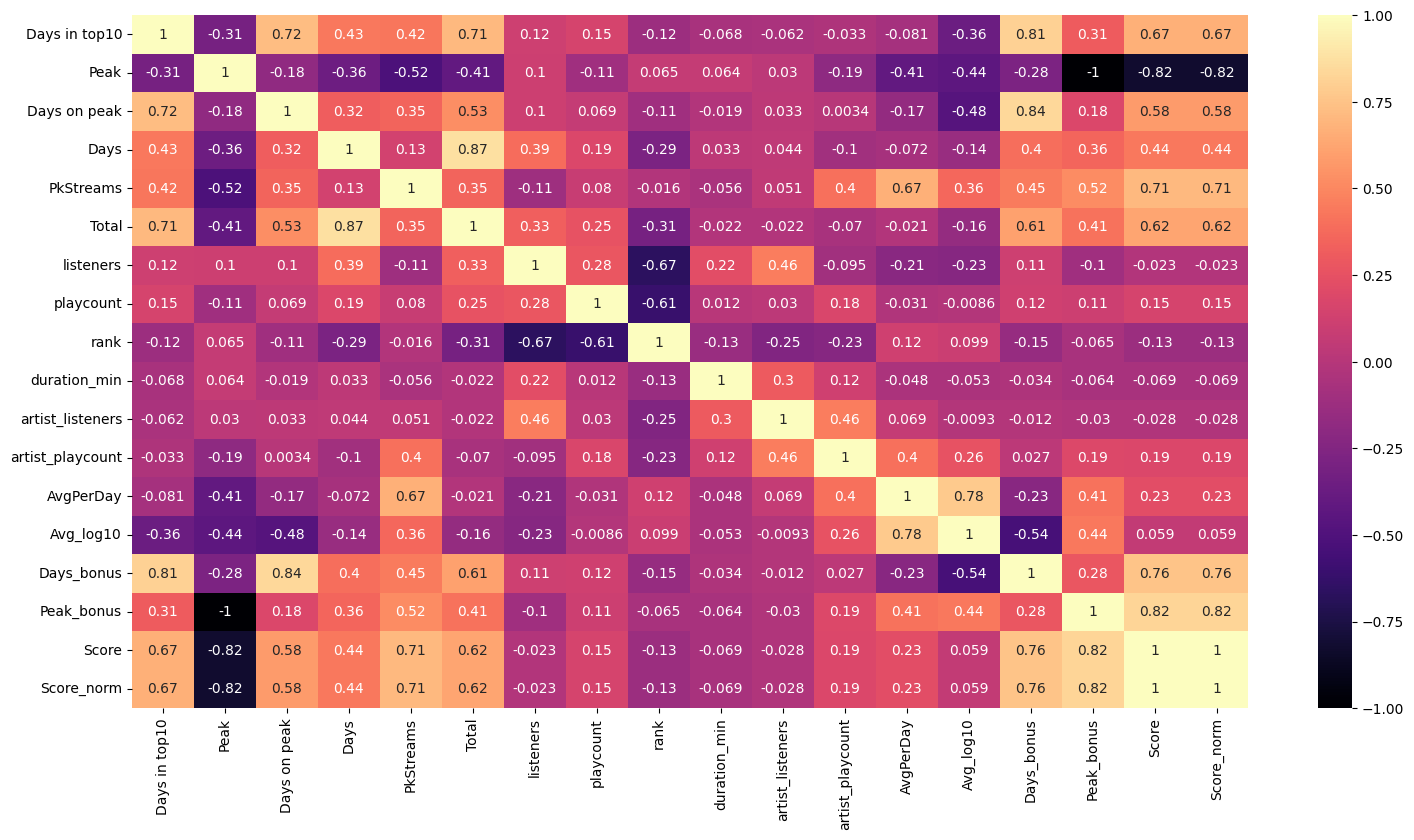

In [ ]:
plt.figure(figsize=(18,9))
sns.heatmap(merged.corr(numeric_only=True), cmap='magma', annot=True)

In [ ]:
merged

,Artist,Song,Days in top10,Peak,Days on peak,Days,PkStreams,Total,listeners,playcount,...,genre,genre_description,artist_listeners,artist_playcount,AvgPerDay,Avg_log10,Days_bonus,Peak_bonus,Score,Score_norm
0,The Weeknd,Blinding Lights,446.0,1,82,2169,8453567,5037607641,2221161,36470257,...,r&b,R&B is a musical genre that began to develop a...,5050479,1031011466,103092,5.013229,2.919078,1.995,29.194845,0.892625
1,Harry Styles,As It Was,426.0,1,81,1272,16103849,3999274385,1867858,39479081,...,pop,Pop music is a broad-term for many different t...,3037938,381185399,198812,5.298445,2.913814,1.995,30.800170,0.957736
2,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,213.0,1,16,2263,5033261,3554729660,1659244,24440448,...,rap,"Rap is a vocal style, usually coming together ...",3354307,312638678,314578,5.497730,2.230449,1.995,24.463499,0.700724
3,The Neighbourhood,Sweater Weather,0.0,12,1,1988,3342205,3532412627,2750909,45328300,...,indie,The term 'indie' is best known as being an abb...,3711268,351516624,3342205,6.524033,1.301030,1.940,16.466648,0.376376
4,The Weeknd,Starboy,145.0,1,40,1963,5125218,3385509594,2172688,30761205,...,r&b,R&B is a musical genre that began to develop a...,5050479,1031011466,128130,5.107654,2.612784,1.995,26.623667,0.788339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,TLC,No Scrubs,0.0,178,1,1,254220,254220,1693347,12231051,...,r&b,R&B is a musical genre that began to develop a...,2529703,31433334,254220,5.405211,1.301030,1.110,7.805900,0.025101
908,Lana Del Rey,Art Deco,0.0,193,1,1,226400,226400,990127,14523928,...,indie,The term 'indie' is best known as being an abb...,5015086,1452606942,226400,5.354878,1.301030,1.035,7.210697,0.000960
909,Katy Perry,Teenage Dream,0.0,134,1,1,186054,186054,2138230,22714306,...,pop,Pop music is a broad-term for many different t...,6874177,414166735,186054,5.269641,1.301030,1.330,9.118429,0.078337
910,Katy Perry,California Gurls,0.0,143,1,1,173970,173970,1553325,12237909,...,pop,Pop music is a broad-term for many different t...,6874177,414166735,173970,5.240477,1.301030,1.285,8.761153,0.063846


## Аня

In [ ]:
df = merged

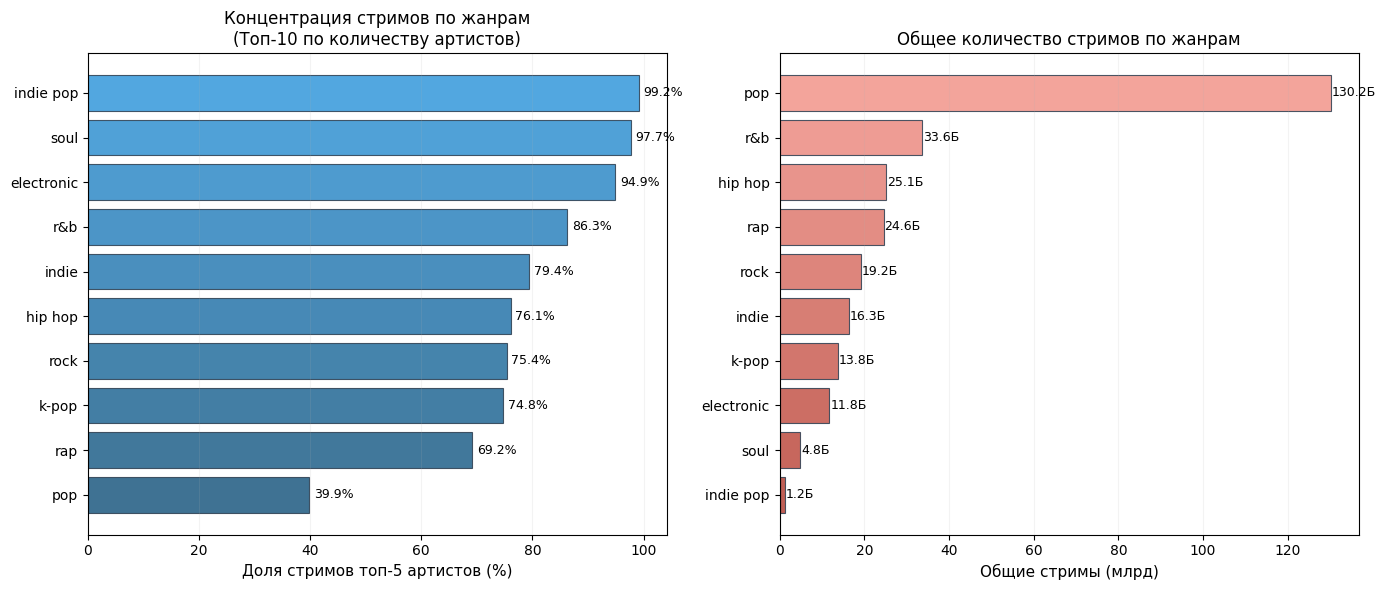

In [ ]:
def calculate_concentration(genre_df, top_n=5):
    artist_streams = genre_df.groupby('Artist')['Total'].sum().sort_values(ascending=False)
    total_genre_streams = artist_streams.sum()

    top_artists_streams = artist_streams.head(top_n).sum()
    concentration_ratio = top_artists_streams / total_genre_streams

    return concentration_ratio

artists_by_genre = df.groupby('genre')['Artist'].nunique().sort_values(ascending=False)
top_10_genres = artists_by_genre.head(10).index.tolist()



concentration_data = []
for genre in top_10_genres:
    genre_df = df[df['genre'] == genre]
    concentration_5 = calculate_concentration(genre_df, 5)

    total_artists = genre_df['Artist'].nunique()
    total_tracks = len(genre_df)
    total_streams = genre_df['Total'].sum() / 1e9

    concentration_data.append({
        'genre': genre,
        'concentration_5': concentration_5,
        'total_artists': total_artists,
        'total_tracks': total_tracks,
        'total_streams_billion': total_streams
    })

concentration_df = pd.DataFrame(concentration_data)
concentration_df = concentration_df.sort_values('concentration_5', ascending=False)


gradient_blue = LinearSegmentedColormap.from_list('blue_gradient', ['#1a5276', '#3498db'])
gradient_orange = LinearSegmentedColormap.from_list('orange_gradient', ['#b03a2e', '#f1948a'])

plt.figure(figsize=(14, 6))

#Диаграмма 1
plt.subplot(1, 2, 1)

colors1 = [gradient_blue(1 - i/len(concentration_df)) for i in range(len(concentration_df))]

bars1 = plt.barh(concentration_df['genre'], concentration_df['concentration_5'] * 100,
                color=colors1, edgecolor='#2c3e50', linewidth=0.8, alpha=0.85)

plt.xlabel('Доля стримов топ-5 артистов (%)', fontsize=11)
plt.title('Концентрация стримов по жанрам\n(Топ-10 по количеству артистов)', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.15, axis='x')


for bar in bars1:
    width = bar.get_width()
    plt.text(width + 0.8, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', ha='left', va='center', fontsize=9)

#Диаграмма 2
plt.subplot(1, 2, 2)
streams_by_genre = concentration_df.sort_values('total_streams_billion', ascending=False)


colors2 = [gradient_orange(1 - i/len(streams_by_genre)) for i in range(len(streams_by_genre))]

bars2 = plt.barh(streams_by_genre['genre'], streams_by_genre['total_streams_billion'],
                color=colors2, edgecolor='#2c3e50', linewidth=0.8, alpha=0.85)

plt.xlabel('Общие стримы (млрд)', fontsize=11)
plt.title('Общее количество стримов по жанрам', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.15, axis='x')


for bar in bars2:
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}Б', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

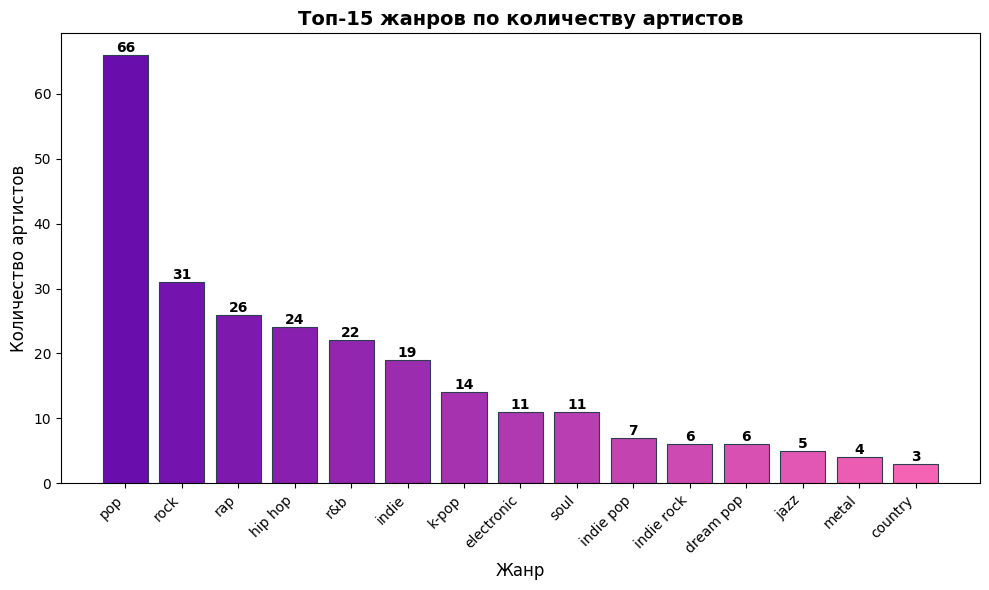

In [ ]:
from matplotlib.colors import LinearSegmentedColormap


artists_by_genre = df.groupby('genre')['Artist'].nunique().sort_values(ascending=False)
top_15_genres = artists_by_genre.head(15)
gradient = LinearSegmentedColormap.from_list('purple_pink', ['#6A0DAD', '#FF69B4'])

plt.figure(figsize=(10, 6))


colors = [gradient(i / len(top_15_genres)) for i in range(len(top_15_genres))]

bars = plt.bar(range(len(top_15_genres)), top_15_genres.values,
               color=colors, edgecolor='#2c3e50', linewidth=0.8)

plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Количество артистов', fontsize=12)
plt.title('Топ-15 жанров по количеству артистов', fontsize=14, fontweight='bold')
plt.xticks(range(len(top_15_genres)), top_15_genres.index, rotation=45, ha='right')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

/tmp/ipython-input-1684484194.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


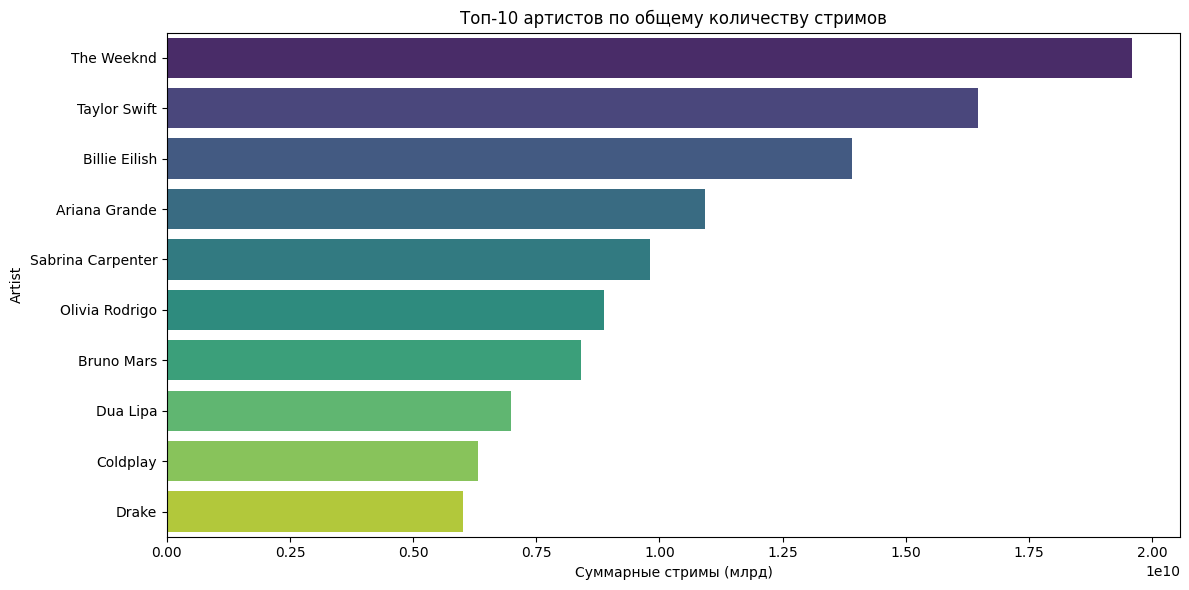

In [ ]:
df['Total'] = (df['Total'].astype(str).pipe(pd.to_numeric))
#че-то не работает почему-то...

top_artists = df.groupby('Artist')['Total'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Топ-10 артистов по общему количеству стримов')
plt.xlabel('Суммарные стримы (млрд)')
plt.tight_layout()
plt.show()

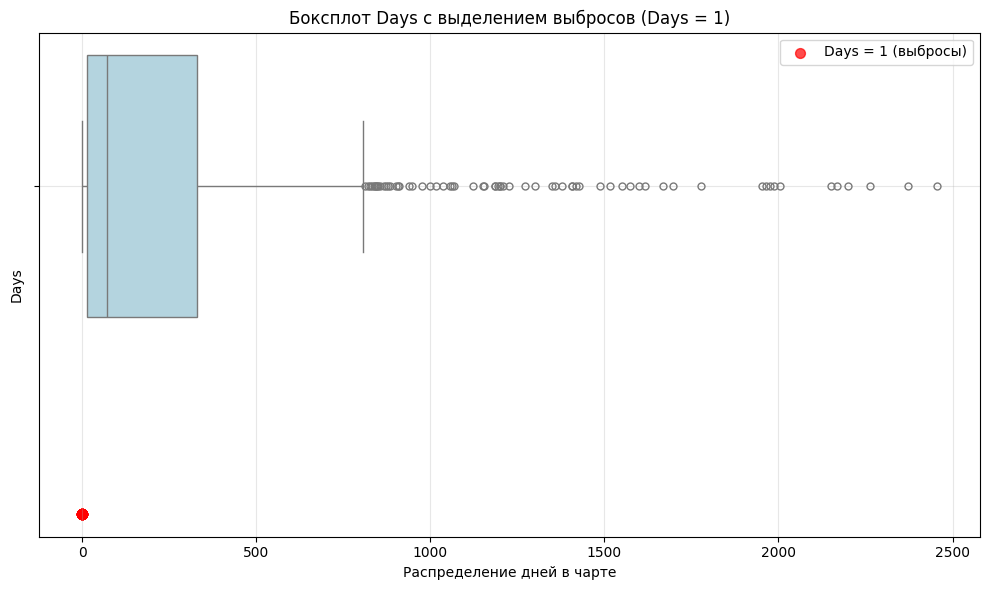

СТАТИСТИКА ПО ВЫБРОСАМ (Days = 1):
Количество треков с Days = 1: 63
Процент от общего количества: 6.91%


In [ ]:
plt.figure(figsize=(10, 6))

box_plot = sns.boxplot(x=df['Days'], color='lightblue', fliersize=5)

outliers = df[df['Days'] == 1]
if not outliers.empty:
    plt.scatter(x=[0] * len(outliers), y=outliers['Days'],
                color='red', s=50, alpha=0.7, label='Days = 1 (выбросы)')
    plt.legend()

plt.xlabel('Распределение дней в чарте')
plt.ylabel('Days')
plt.title('Боксплот Days с выделением выбросов (Days = 1)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



## Дима

 Длина трека почти не влияет на шанс стать хитом - ограничивать её нет смысла.

Формулировка:

Так как duration_min имеет близкую к нулю корреляцию с Score, Total, PkStreams, успех трека практически не зависит от его длины.

Почему это важно бизнесу:
Платформе не нужно “подгонять” релизы под условные 2:30–3:00 ради стриминга. Можно спокойно подписывать и продвигать как короткие, так и длинные треки, не боясь падения метрик.

/tmp/ipython-input-1446243343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="duration_group", y="Score", data=df, palette="Reds")


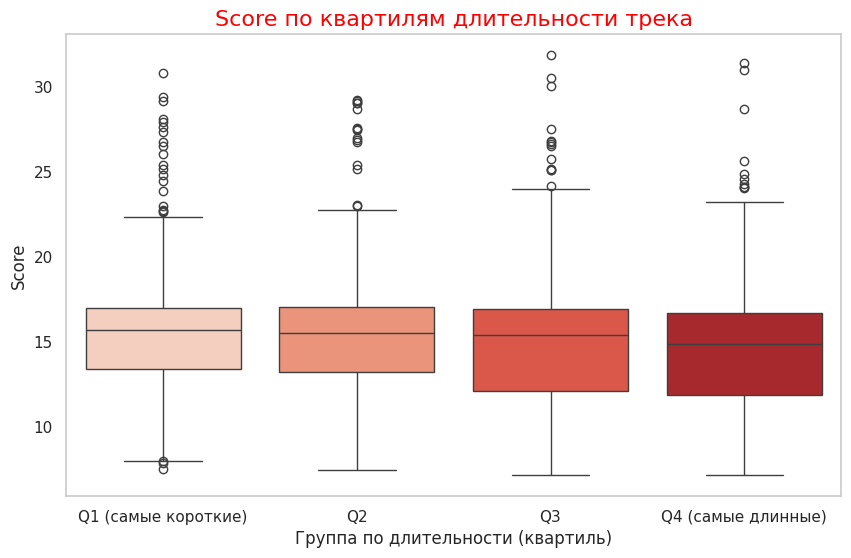

In [ ]:
df["duration_group"], bins = pd.qcut(df["duration_min"],q=4, labels=["Q1 (самые короткие)", "Q2", "Q3", "Q4 (самые длинные)"],retbins=True)
plt.figure(figsize=(10,6))
sns.boxplot(x="duration_group", y="Score", data=df, palette="Reds")
plt.title("Score по квартилям длительности трека", color="red", fontsize=16)
plt.xlabel("Группа по длительности (квартиль)")
plt.ylabel("Score")
plt.grid(False)
plt.show()

In [ ]:
print("Границы квартилей (мин):", np.round(bins, 2))

/tmp/ipython-input-2456624410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="duration_group", y=df["Total"]/1e6, data=df, showfliers=False, palette="Blues",medianprops={"linewidth": 2, "color": "orange"})


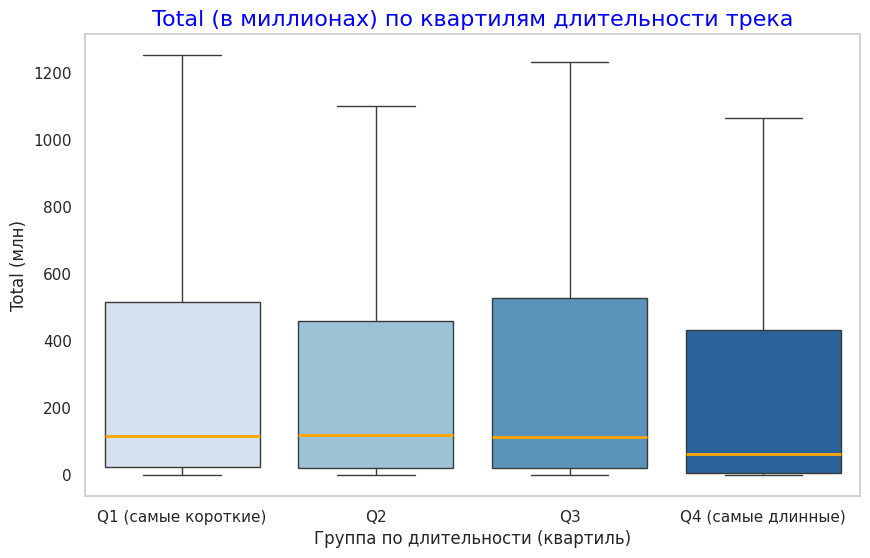

In [ ]:



plt.figure(figsize=(10,6))
sns.boxplot(x="duration_group", y=df["Total"]/1e6, data=df, showfliers=False, palette="Blues",medianprops={"linewidth": 2, "color": "orange"})
plt.title("Total (в миллионах) по квартилям длительности трека", color="blue", fontsize=16)
plt.xlabel("Группа по длительности (квартиль)")
plt.ylabel("Total (млн)")
plt.grid(False)
plt.show()


## Стас

<Axes: >

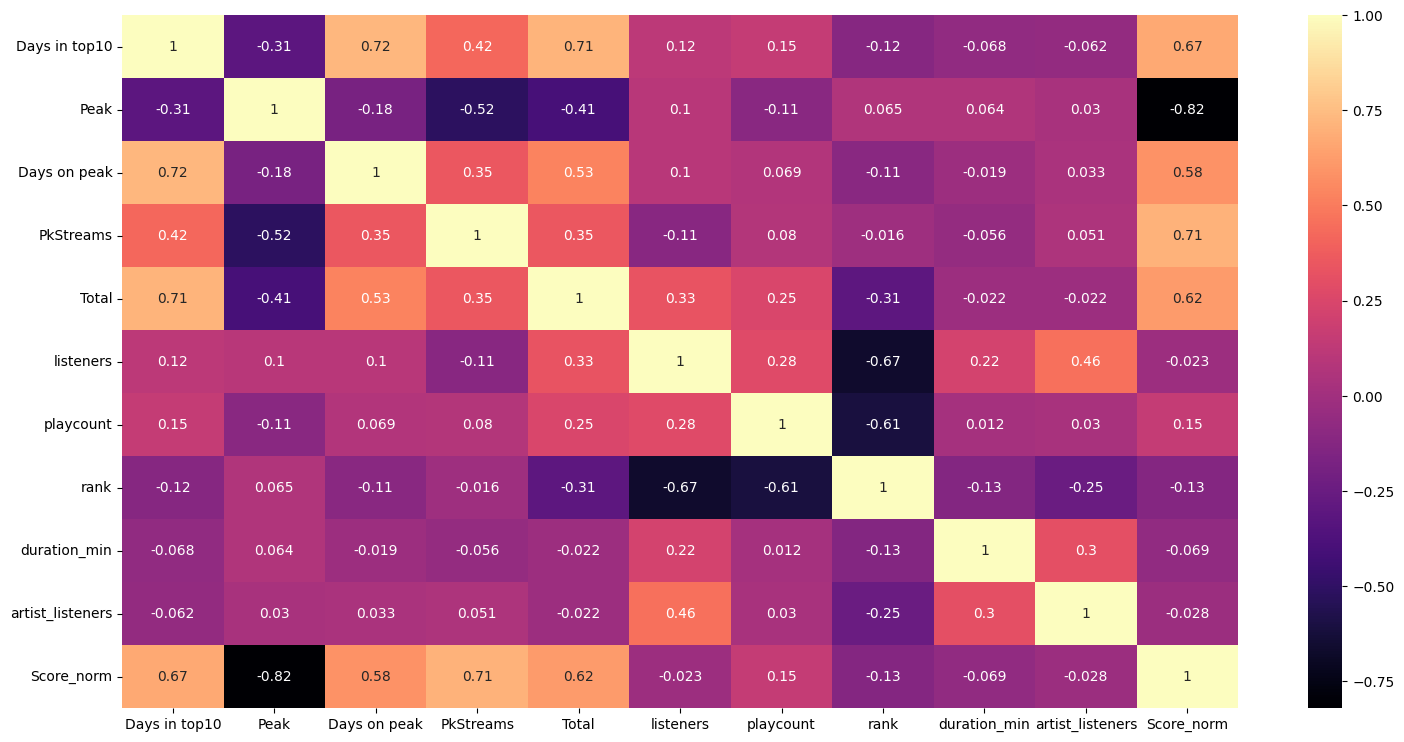

In [ ]:
cols = ['Days in top10', 'Peak', 'Days on peak', 'PkStreams', 'Total', 'listeners', 'playcount', 'rank', 'duration_min', 'artist_listeners', 'Score_norm']
plt.figure(figsize=(18, 9))
sns.heatmap(merged[cols].corr(numeric_only=True), cmap='magma', annot=True)

Гипотеза 20% артистов дают 80% стримов

Небольшая группа артистов (≈ верхние 20% по суммарному Score или Total) приносит большую часть общего объёма прослушиваний

Почему это важно бизнесу:
Можно спланировать “минимальный набор” подписаний для старта в стране: подпиши 20% ключевых артистов - получи львиную долю потребительской ценности.

In [ ]:
artist_stats = merged.groupby('Artist', as_index=False)['Score'].sum()
artist_stats = artist_stats.sort_values(by='Score', ascending=False)
artist_stats

,Artist,Score
239,Taylor Swift,1141.853879
19,Ariana Grande,697.511178
217,Sabrina Carpenter,425.754040
33,Billie Eilish,407.659045
259,The Weeknd,391.582657
...,...,...
232,TLC,7.805900
255,The Rolling Stones,7.688770
153,M.I.A.,7.522032
154,M83,7.355648


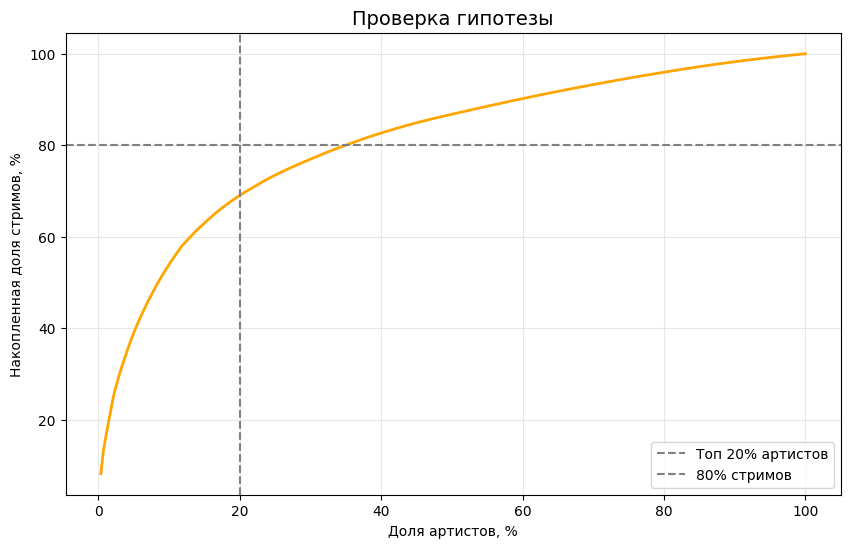

Топ10% артистов дают 53.3% всех стримов
Топ20% артистов дают 68.8% всех стримов


In [ ]:
artist_stats['share'] = artist_stats['Score'] / artist_stats['Score'].sum()
artist_stats['cum_share'] = artist_stats['share'].cumsum()

artist_stats['artist_percentile'] = np.arange(1, len(artist_stats)+1) / len(artist_stats)

plt.figure(figsize=(10,6))
plt.plot(artist_stats['artist_percentile']*100, artist_stats['cum_share']*100, color='orange', linewidth=2)
plt.axvline(x=20, color='gray', linestyle='--', label='Топ 20% артистов')
plt.axhline(y=80, color='gray', linestyle='--', label='80% стримов')
plt.title("Проверка гипотезы", fontsize=14)
plt.xlabel("Доля артистов, %")
plt.ylabel("Накопленная доля стримов, %")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

top10 = artist_stats.iloc[:int(0.1*len(artist_stats))]['Score'].sum() / artist_stats['Score'].sum()
top20 = artist_stats.iloc[:int(0.2*len(artist_stats))]['Score'].sum() / artist_stats['Score'].sum()

print(f"Топ10% артистов дают {round(top10*100, 1)}% всех стримов")
print(f"Топ20% артистов дают {round(top20*100, 1)}% всех стримов")

Гипотеза “Долгоживущие хитмейкеры” важнее для ядра каталога, чем “вирусники”.

Артисты, чьи треки имеют высокий средний Days in top10 и Days_on_peak, формируют основу каталога , а артисты с очень высоким AvgPerDay и PkStreams, но низким Days in top10  это “вирусный слой” для PR и TikTok-кампаний.

Почему это важно бизнесу:
отмечаем
кого подписываем “дорого и надолго” (evergreen-артисты),
кого берём точечно для вирусного хайпа.

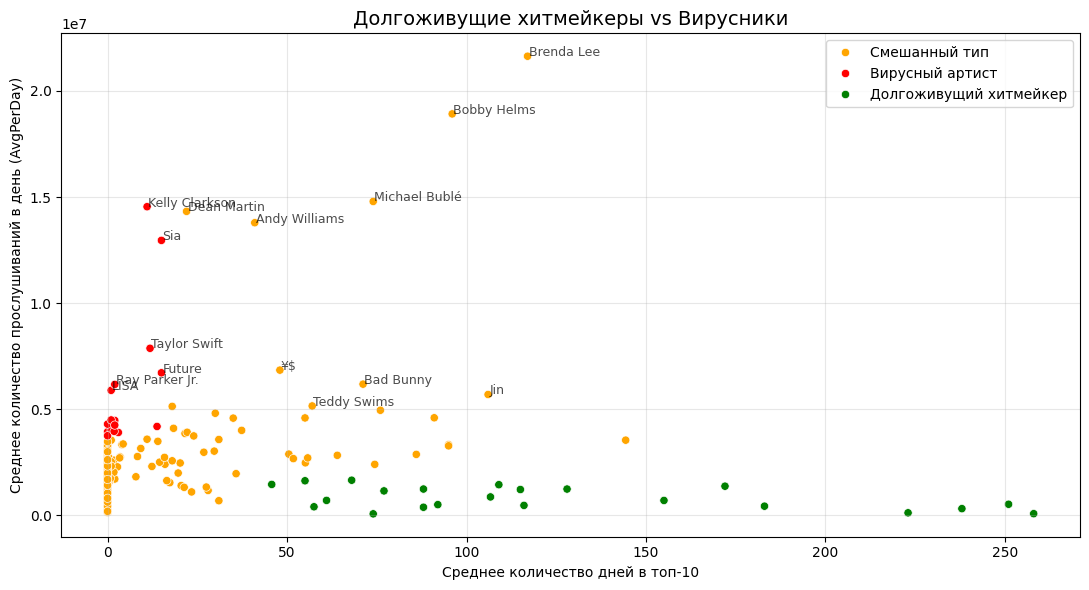

ArtistType
Смешанный тип             250
Долгоживущий хитмейкер     22
Вирусный артист            16
Name: count, dtype: int64


In [ ]:
df_artist_summary = merged.groupby('Artist', as_index=False).agg({'Days in top10': 'mean','Days on peak': 'mean', 'AvgPerDay': 'mean','PkStreams': 'mean'})

df_artist_summary['Z_days'] = (df_artist_summary['Days in top10'] - df_artist_summary['Days in top10'].mean()) / df_artist_summary['Days in top10'].std()
df_artist_summary['Z_avg'] = (df_artist_summary['AvgPerDay'] - df_artist_summary['AvgPerDay'].mean()) / df_artist_summary['AvgPerDay'].std()

def categorize_artist(row):
    if row['Z_days'] > 0.5 and row['Z_avg'] < 0:
        return 'Долгоживущий хитмейкер'
    elif row['Z_days'] < 0 and row['Z_avg'] > 0.5:
        return 'Вирусный артист'
    else:
        return 'Смешанный тип'

df_artist_summary['ArtistType'] = df_artist_summary.apply(categorize_artist, axis=1)

plt.figure(figsize=(11,6))
sns.scatterplot(data=df_artist_summary,x='Days in top10',y='AvgPerDay',hue='ArtistType', palette={'Долгоживущий хитмейкер': 'green','Вирусный артист': 'red','Смешанный тип': 'orange'})

for _, row in df_artist_summary.nlargest(15, 'AvgPerDay').iterrows():
    plt.text(row['Days in top10'] + 0.3, row['AvgPerDay'], row['Artist'], fontsize=9, alpha=0.7)

plt.title("Долгоживущие хитмейкеры vs Вирусники", fontsize=14)
plt.xlabel("Среднее количество дней в топ-10")
plt.ylabel("Среднее количество прослушиваний в день (AvgPerDay)")
plt.legend(title="")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(df_artist_summary['ArtistType'].value_counts())


## Коля

In [ ]:
df = merged
df

,Artist,Song,Days in top10,Peak,Days on peak,Days,PkStreams,Total,listeners,playcount,...,genre_description,artist_listeners,artist_playcount,AvgPerDay,Avg_log10,Days_bonus,Peak_bonus,Score,Score_norm,plays_per_listener
0,The Weeknd,Blinding Lights,446.0,1,82,2169,8453567,5037607641,2221161,36470257,...,R&B is a musical genre that began to develop a...,5050479,1031011466,103092,5.013229,2.919078,1.995,29.194845,0.892625,204.141323
1,Harry Styles,As It Was,426.0,1,81,1272,16103849,3999274385,1867858,39479081,...,Pop music is a broad-term for many different t...,3037938,381185399,198812,5.298445,2.913814,1.995,30.800170,0.957736,125.475042
2,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,213.0,1,16,2263,5033261,3554729660,1659244,24440448,...,"Rap is a vocal style, usually coming together ...",3354307,312638678,314578,5.497730,2.230449,1.995,24.463499,0.700724,93.205147
3,The Neighbourhood,Sweater Weather,0.0,12,1,1988,3342205,3532412627,2750909,45328300,...,The term 'indie' is best known as being an abb...,3711268,351516624,3342205,6.524033,1.301030,1.940,16.466648,0.376376,94.716044
4,The Weeknd,Starboy,145.0,1,40,1963,5125218,3385509594,2172688,30761205,...,R&B is a musical genre that began to develop a...,5050479,1031011466,128130,5.107654,2.612784,1.995,26.623667,0.788339,204.141323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,TLC,No Scrubs,0.0,178,1,1,254220,254220,1693347,12231051,...,R&B is a musical genre that began to develop a...,2529703,31433334,254220,5.405211,1.301030,1.110,7.805900,0.025101,12.425701
908,Lana Del Rey,Art Deco,0.0,193,1,1,226400,226400,990127,14523928,...,The term 'indie' is best known as being an abb...,5015086,1452606942,226400,5.354878,1.301030,1.035,7.210697,0.000960,289.647464
909,Katy Perry,Teenage Dream,0.0,134,1,1,186054,186054,2138230,22714306,...,Pop music is a broad-term for many different t...,6874177,414166735,186054,5.269641,1.301030,1.330,9.118429,0.078337,60.249647
910,Katy Perry,California Gurls,0.0,143,1,1,173970,173970,1553325,12237909,...,Pop music is a broad-term for many different t...,6874177,414166735,173970,5.240477,1.301030,1.285,8.761153,0.063846,60.249647


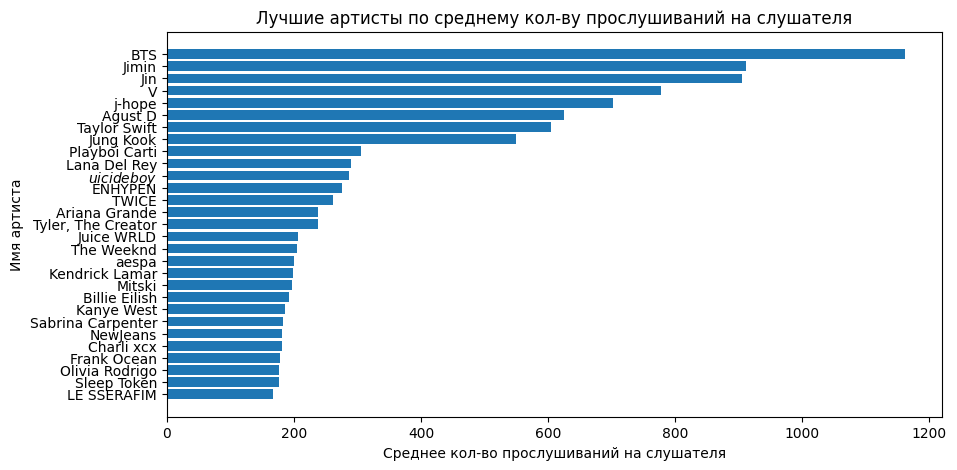

In [ ]:
df["plays_per_listener"] = df["artist_playcount"] / df["artist_listeners"]
agg = (
    df.groupby("Artist")
      .agg(
          plays_per_listener=("plays_per_listener", "mean"),
          songs=("Song", "count"),
          score=("Score", "mean")
      )
      .reset_index()
)
# взял топ 10
q = agg["plays_per_listener"].quantile(0.90)
top_df = agg[agg["plays_per_listener"] >= q].sort_values("plays_per_listener", ascending=False)

# === ПЕРВЫЙ ГРАФИК: Barplot ===
plt.figure(figsize=(10,5))
plt.barh(top_df["Artist"], top_df["plays_per_listener"])
plt.xlabel("Среднее кол-во прослушиваний на слушателя")
plt.ylabel("Имя артиста")
plt.title("Лучшие артисты по среднему кол-ву прослушиваний на слушателя")
plt.gca().invert_yaxis()   # чтобы сверху был лучший артист
plt.show()

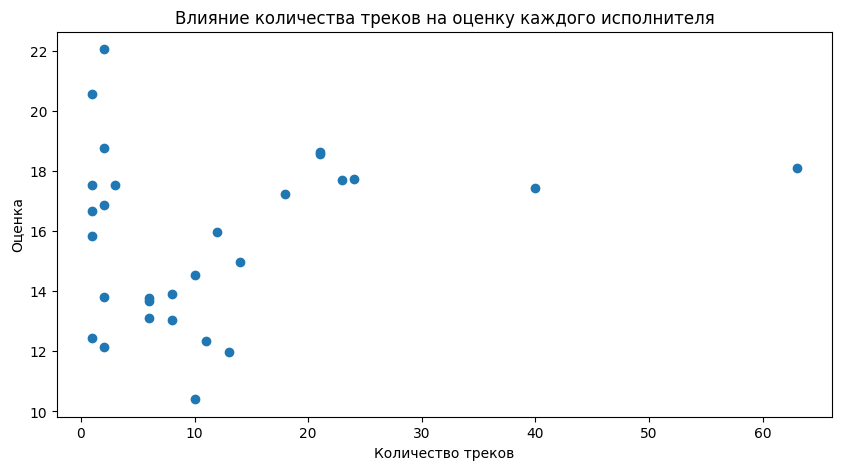

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(top_df["songs"], top_df["score"])
plt.xlabel("Количество треков")
plt.ylabel("Оценка")
plt.title("Влияние количества треков на оценку каждого исполнителя")
plt.show()